## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.optimize as optimize
import seaborn as sns 
import math 

## Data Acquisition
On reading the .csv files, we parse the **Date** column as **Datetime** instead of the default datatype **String**.<br>
Once this is done, the **Date** and **Value** coulmn of the dataset are stored in different variables.

In [2]:
opec = pd.read_csv('OPEC-ORB.csv')
opec['Date'] = pd.to_datetime(opec['Date'])
#opec.head()

opec_dates = opec['Date']
#opec_dates.head()

opec_values = opec['Value']
#opec_values.head()

## Histogram and Density Curve plots
The following curves show the actual probability distribution in the dataset.

Text(0.5, 1.0, 'Density Plot')

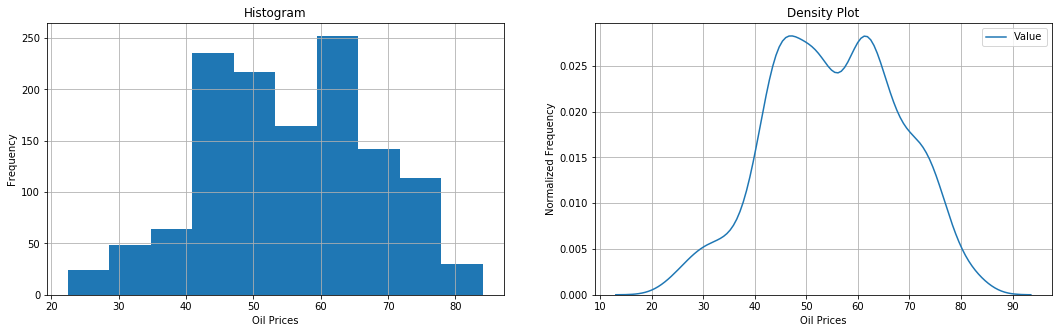

In [3]:
plt.rcParams['figure.figsize'] = 18,5
fig , (ax1, ax2) = plt.subplots(1,2)

#histogram plotting
ax1.hist(opec_values)
ax1.grid()
ax1.set_xlabel('Oil Prices')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram')

#kdeplot
sns.kdeplot(opec_values, ax=ax2)
ax2.grid()
ax2.set_xlabel('Oil Prices')
ax2.set_ylabel('Normalized Frequency')
ax2.set_title('Density Plot')

The above curves make it obvious that the dataset has a close to **Normal Dstribution**. Let us define a normal distribution just using simple python computations.


## Defining a Normal Distribution.
By computing the mean and standard deviation of the dataset, it is easy to define a normal curve for our data.

In [4]:
# mean
m = opec_values.mean()
# standard deviation
sd = opec_values.std()

# normal distribution function
y = norm.pdf(opec_values,m,sd)

### Theoritical Distribution over actual Density Curve (To show the goodness of fit)
The following plots show the theoretical normal distributions defined previously and also on how it compares to the actual density curve. 

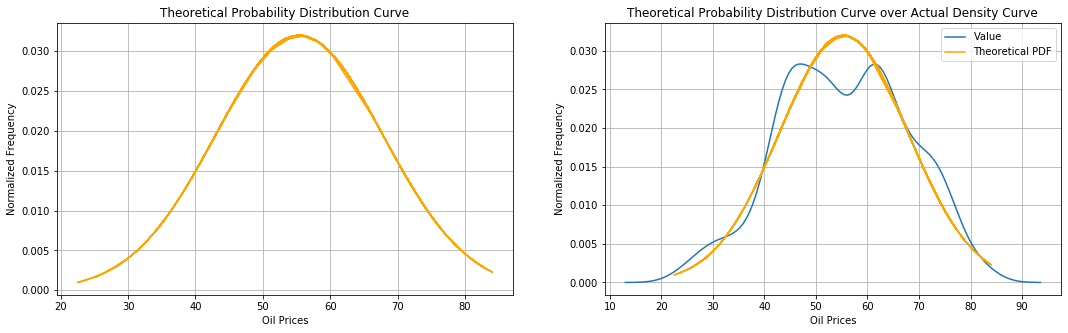

In [5]:
plt.rcParams['figure.figsize'] = 18,5
fig, (ax1, ax2) = plt.subplots(1, 2)

# theoritical distribution
ax1.plot(opec_values,y, color="orange")
ax1.set_title('Theoretical Probability Distribution Curve')
ax1.set_xlabel('Oil Prices')
ax1.set_ylabel('Normalized Frequency')
ax1.grid()

# theoritical vs actual distribution
sns.kdeplot(opec_values, ax=ax2)
ax2.plot(opec_values,y, color="orange", label='Theoretical PDF')
ax2.set_title('Theoretical Probability Distribution Curve over Actual Density Curve')
ax2.set_xlabel('Oil Prices')
ax2.set_ylabel('Normalized Frequency')
ax2.grid()
ax2.legend()

## Defining Log Likelihood Function
This is the fuction that we have to optimize in order to determine the parameters of the probability distribution.<br>
For each probability distribution under consideration for our model, we have to define a **Log Likelihood** function.<br>
For the **Normal Distribution** the likelihood fucntion is as follows:

In [6]:
def ll_normal(par,data):
    m = par[0]
    sd = par[1]
    return (np.sum(math.log((2*math.pi*(sd**2)))/2 + ((data-m)**2)/(2 * (sd**2))))

## Obtaining Parameters of Normal Distribution through MLE
The **optimize** module in **scipy** is used to minimize the log likelihood function which optimizes the likelihood of observing the set of parameters passed as the second argument in the **minimize()** function.

In [7]:
mle_result = optimize.minimize(ll_normal, [1,1], opec_values)
print(mle_result.x)

[55.39767549 12.46745565]


In [8]:
print("Mean using python functions - ", m)
print("Mean using python functions - ", sd)
print()
print("Mean using MLE - ", mle_result.x[0])
print("Standard Deviation using MLE- ", mle_result.x[1])

Mean using python functions -  55.39767441860465
Mean using python functions -  12.472291008355096

Mean using MLE -  55.39767548799715
Standard Deviation using MLE-  12.467455654787093


The Parameters obtained are very similar to the Mean and Standard Deviation calculated using python functions. 

### Plotting the Normal Distribution obtained using MLE over the Density Curve (To show goodness of fit)

In [9]:
y_mle = norm.pdf(opec_values, mle_result.x[0], mle_result.x[1])

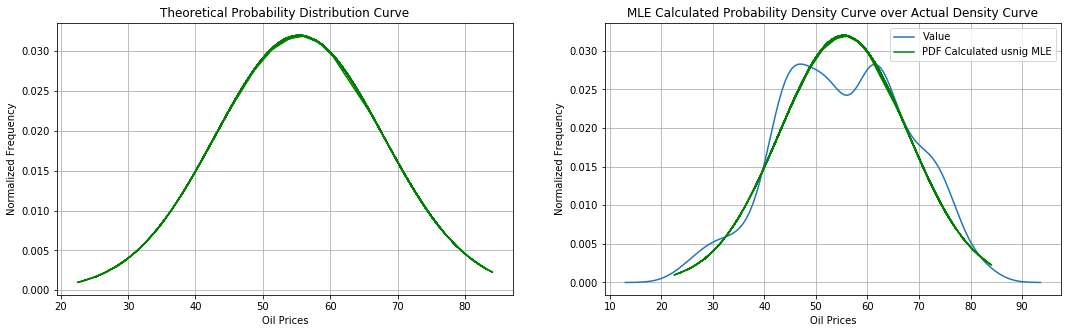

In [10]:
plt.rcParams['figure.figsize'] = 18,5
fig, (ax1, ax2) = plt.subplots(1, 2)

# theoritical density curve
ax1.plot(opec_values, y_mle, color="green")
ax1.set_title('Theoretical Probability Distribution Curve')
ax1.set_xlabel('Oil Prices')
ax1.set_ylabel('Normalized Frequency')
ax1.grid()

# theoritical vs actual density curve
sns.kdeplot(opec_values, ax=ax2)
ax2.plot(opec_values, y_mle, color="green", label='PDF Calculated usnig MLE')
ax2.set_title('MLE Calculated Probability Density Curve over Actual Density Curve')
ax2.set_xlabel('Oil Prices')
ax2.set_ylabel('Normalized Frequency')
ax2.grid()
ax2.legend()

# Conclusion
Normal Distribution is a good fit for the dataset based on the above plots.<br>

# References
- [Normal Distribution MLE Theory](https://towardsdatascience.com/maximum-likelihood-estimation-explained-normal-distribution-6207b322e47f)
- [Log Likelihood of Normal Distribution](https://stackoverflow.com/questions/55509041/loglikelihood-of-normal-distribution)
- [Choosing a Probability Distribution](http://wiki.analytica.com/Choosing_an_appropriate_distribution)
- [Time Series Dataset Analysis](https://www.statisticssolutions.com/time-series-analysis/#:~:targetText=Curve%20fitting%20in%20time%20series,shows%20the%20non%2Dlinear%20behavior%3A&targetText=Curve%20fitting%20can%20be%20performed,estimation%E2%80%9D%20from%20the%20regression%20option.)
- [Time Series Pattern Analysis](http://www.statsoft.com/textbook/time-series-analysis)